# Multiple Linear regression - Geely Auto
By - Debojyoti Mallick

## Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

## Business Goals

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

## Step 1 - Reading and understanding the data

In [487]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [488]:
import numpy as np
import pandas as pd

In [489]:
# Reading the data and storing the data in 'car' dataframe
car = pd.read_csv("C:\python_project_files\CarPrice_Assignment.csv")

In [490]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [491]:
# No missing data in dataset
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [492]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Visualising the Data

In [493]:
import matplotlib.pyplot as plt
import seaborn as sns

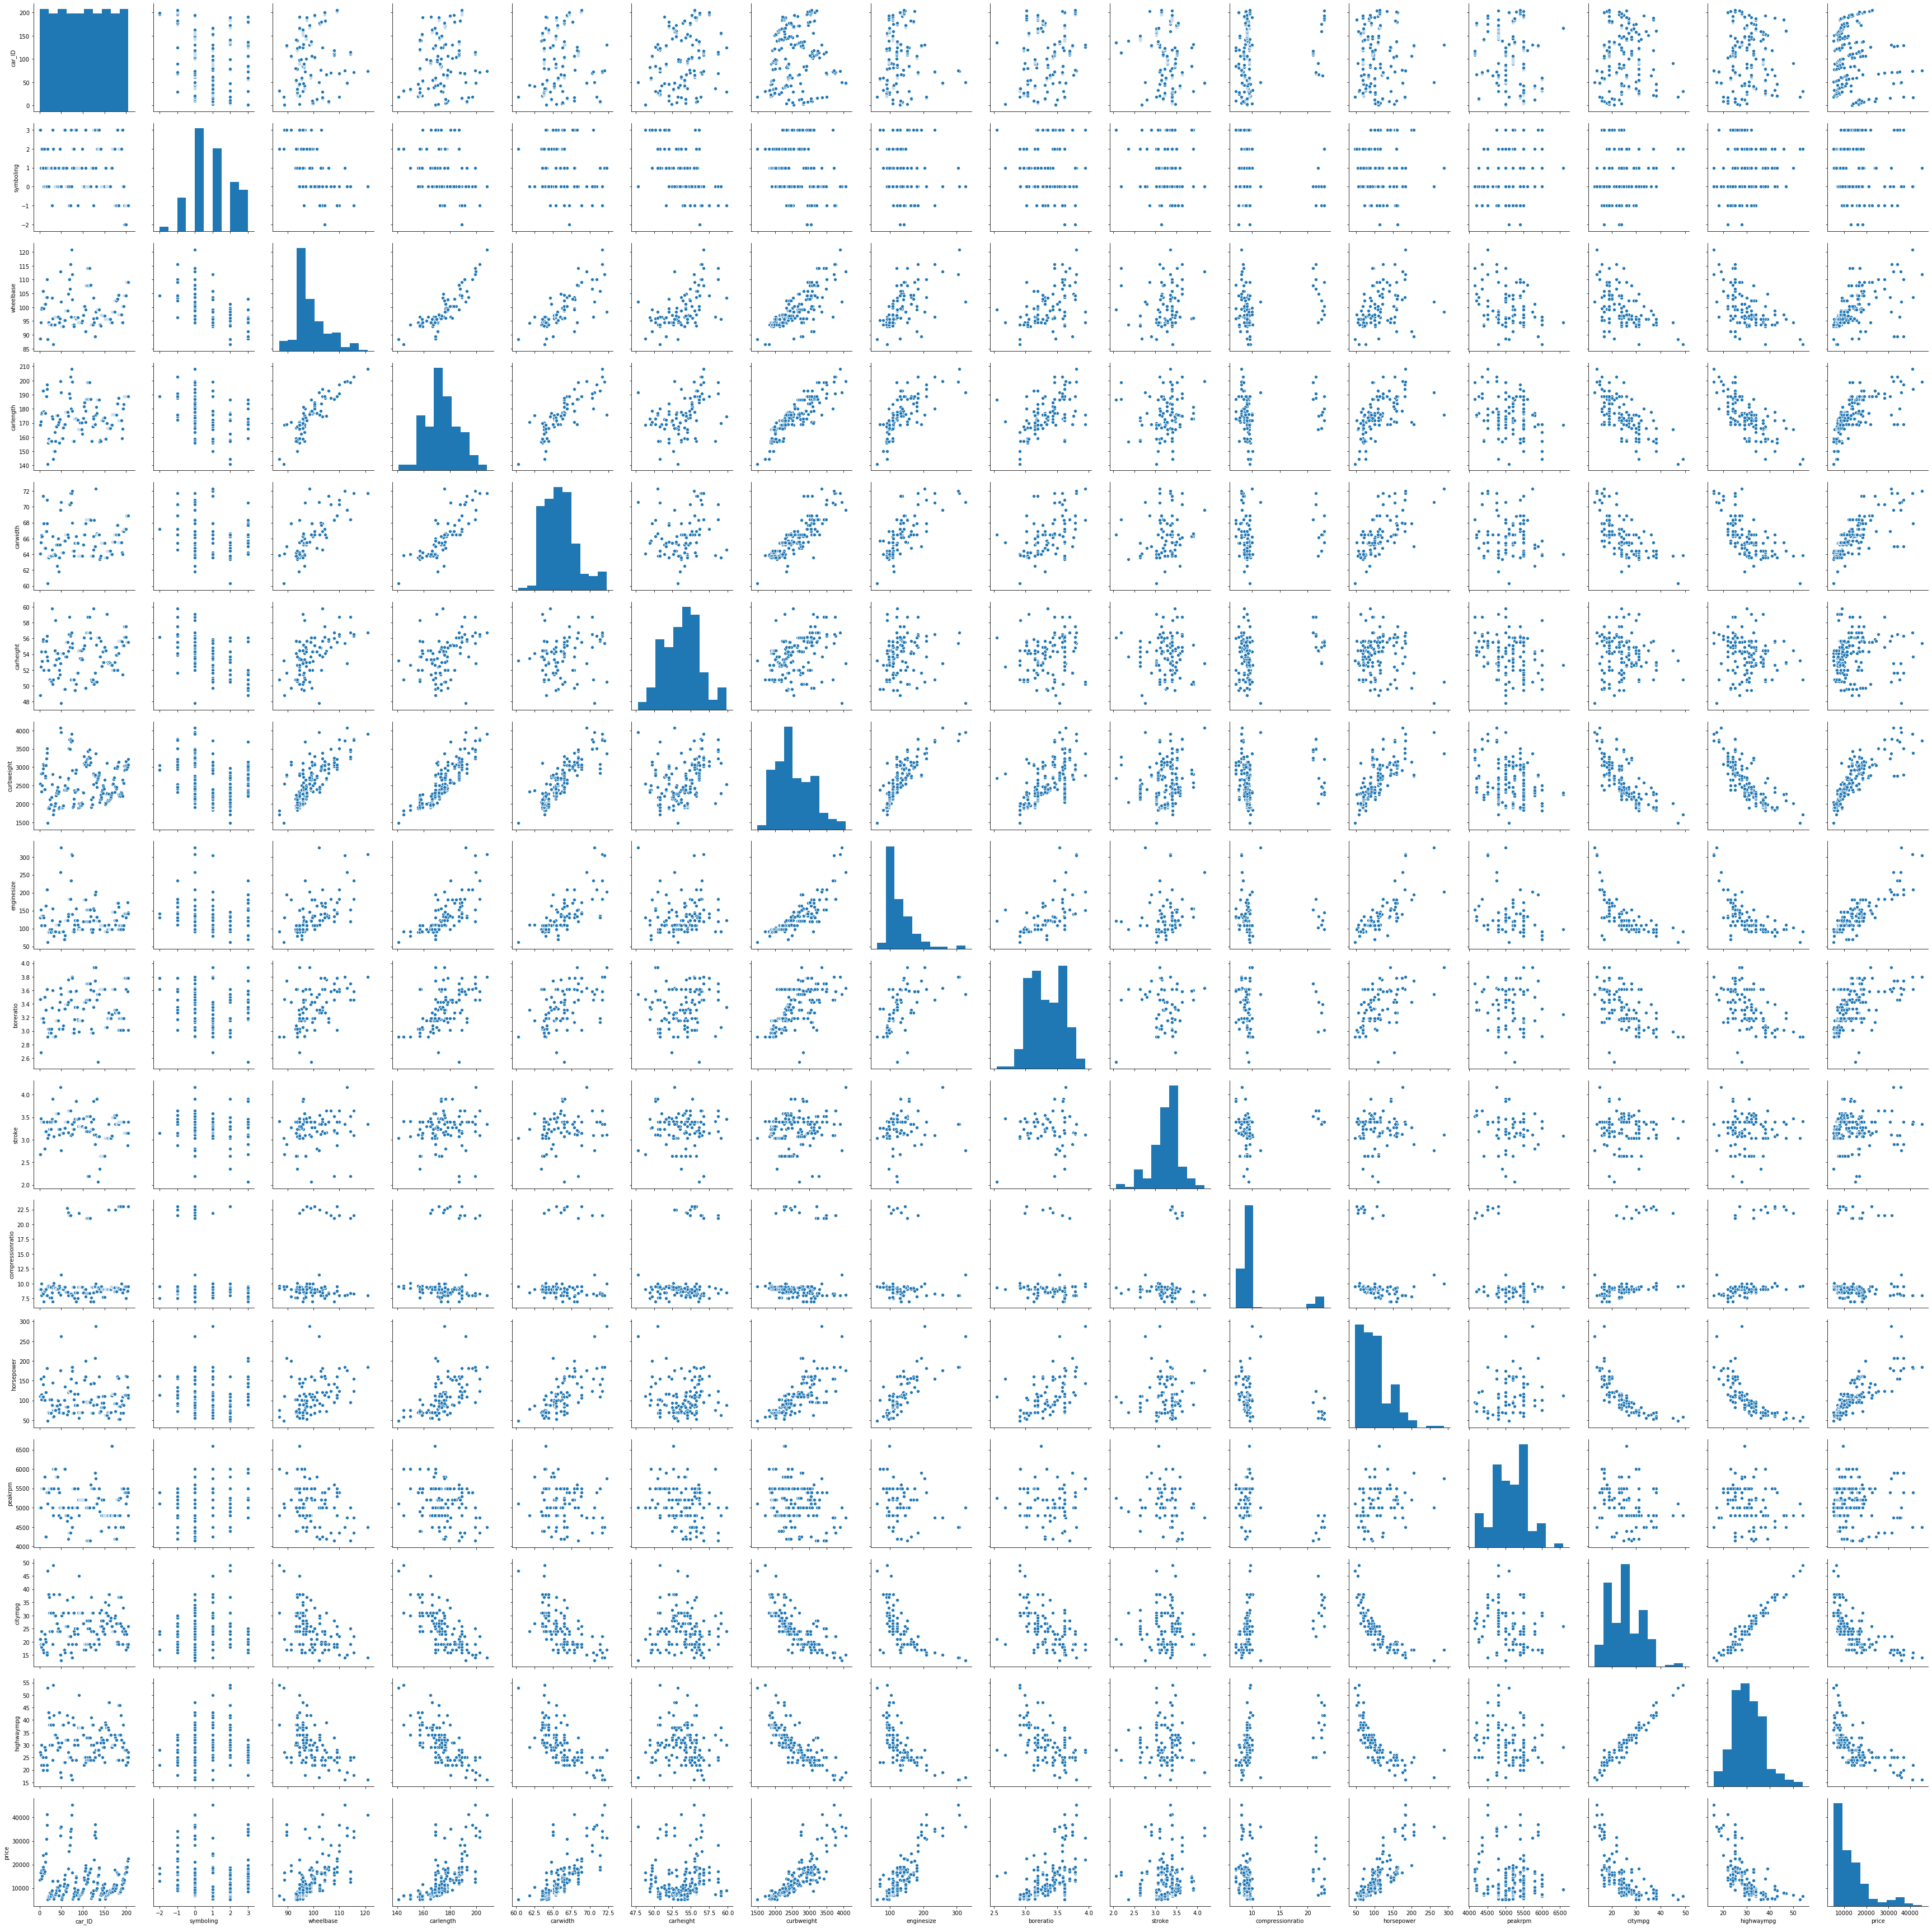

In [8]:
sns.pairplot(car, height = 3)
plt.show()

### Its evident from the above plot that some of the variables are linearly related to the price feature, so we can go ahead with linear regression .

## Visualising Categorical varibales

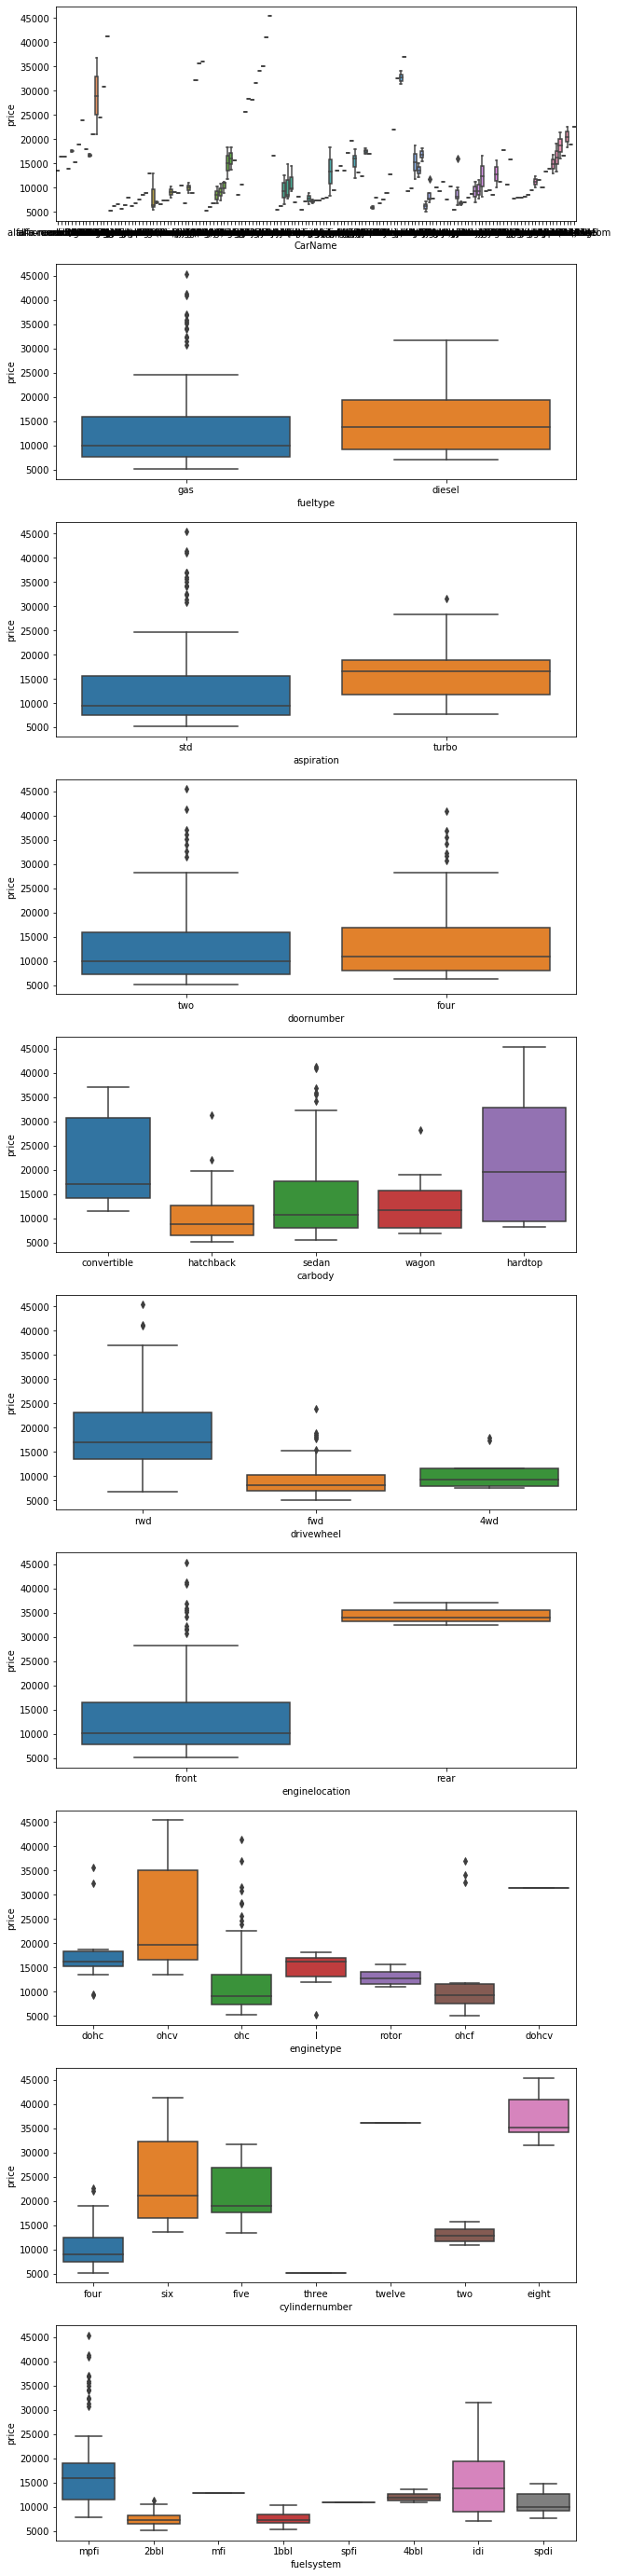

In [9]:
plt.figure(figsize=(10, 50))
plt.subplot(10,1,1)
sns.boxplot(x = 'CarName', y = 'price', data = car)
plt.subplot(10,1,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(10,1,3)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(10,1,4)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(10,1,5)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(10,1,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.subplot(10,1,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.subplot(10,1,8)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(10,1,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(10,1,10)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)
plt.show()

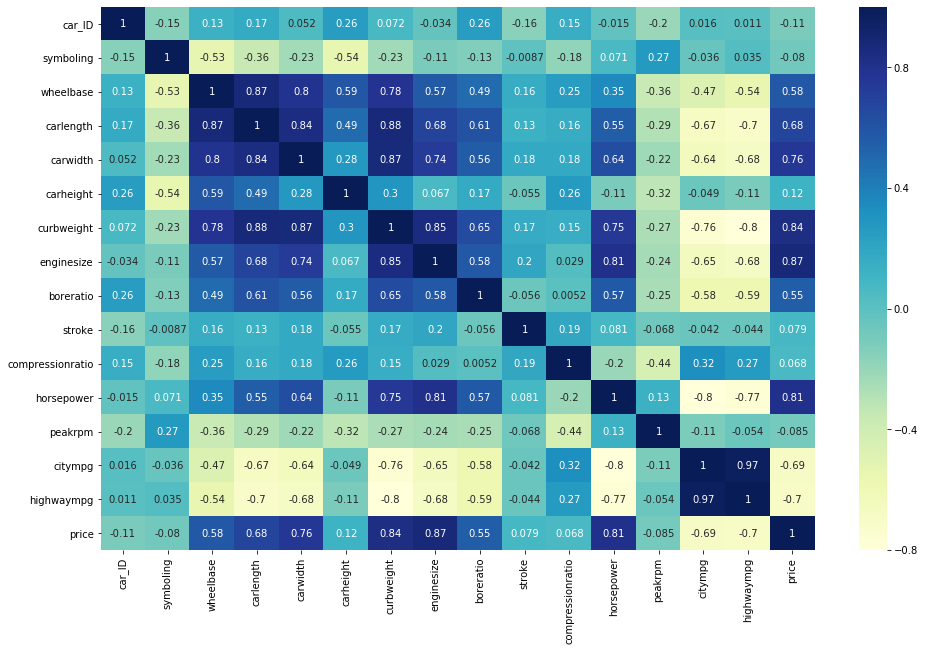

In [50]:
plt.figure(figsize = (16, 10))
cor=car.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

- From the above we can see that the variables like horsepower, enginesize, curbweight, carwidth, wheelbase have strong correlation with price.
- Also some of the variables have multicolinearity that is exibited by the above heat map.


## Step 3: Data Preparation

In [494]:
# Dropping car_ID cell as its not needed for analysis
car = car.drop('car_ID', axis =1)

Symboling is a categorical variable which has been treeted as a numeric int64 type variable. Let's convert the symboling variable.
Here Symboling is the assigned insurance risk rating,A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
Let's make the category clear by classifying based on risk

-ve symboling as safe
0, 1 as moderate
2,3 as risky

In [495]:
#Changing symboling to grouping variable
car['symboling'] = car['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

### Finding outliner for all numeric variables

In [496]:
# List of numeric varibales:
numeric_variables = list(car.columns[car.dtypes != 'object'])
print(numeric_variables)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


### Lets create box plot for each of the numeric variables and see if any outlier exists and should be treated. Treating outlier is very much needed for linear regression else it can heavily impact the prediction.

{'whiskers': [<matplotlib.lines.Line2D at 0x275fba79788>,
 'caps': [<matplotlib.lines.Line2D at 0x275fba82f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x275fba72448>],
 'medians': [<matplotlib.lines.Line2D at 0x275fba87f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x275fba87b08>],
 'means': []}

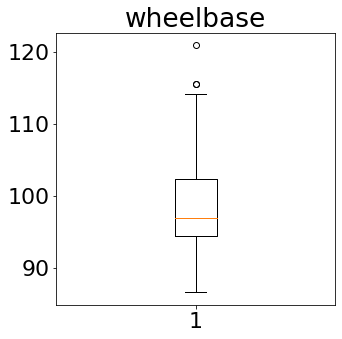

In [497]:
plt.figure(figsize=(5, 5))
plt.rcParams.update({'font.size': 22})
plt.title('wheelbase')
plt.boxplot(x = 'wheelbase', data = car)

{'whiskers': [<matplotlib.lines.Line2D at 0x275fbad2508>,
 'caps': [<matplotlib.lines.Line2D at 0x275fbadaf08>,
 'boxes': [<matplotlib.lines.Line2D at 0x275fbaca1c8>],
 'medians': [<matplotlib.lines.Line2D at 0x275fbadfe88>],
 'fliers': [<matplotlib.lines.Line2D at 0x275fbadff88>],
 'means': []}

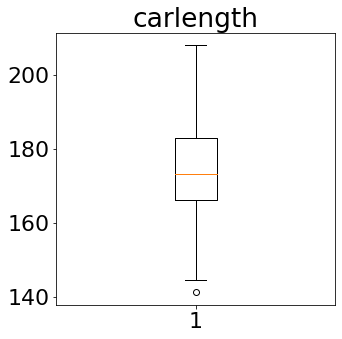

In [498]:
plt.figure(figsize=(5, 5))
plt.rcParams.update({'font.size': 22})
plt.title('carlength')
plt.boxplot(x = 'carlength', data = car)

{'whiskers': [<matplotlib.lines.Line2D at 0x275fbb26388>,
 'caps': [<matplotlib.lines.Line2D at 0x275fbb36f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x275fbb26088>],
 'medians': [<matplotlib.lines.Line2D at 0x275fbb3cec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x275fbb3cfc8>],
 'means': []}

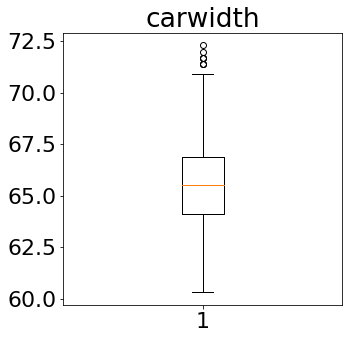

In [499]:
plt.figure(figsize=(5, 5))
plt.rcParams.update({'font.size': 22})
plt.title('carwidth')
plt.boxplot(x = 'carwidth', data = car)

{'whiskers': [<matplotlib.lines.Line2D at 0x275fd05afc8>,
 'caps': [<matplotlib.lines.Line2D at 0x275fd05ec88>,
 'boxes': [<matplotlib.lines.Line2D at 0x275fbb85948>],
 'medians': [<matplotlib.lines.Line2D at 0x275fd05ee08>],
 'fliers': [<matplotlib.lines.Line2D at 0x275fd063cc8>],
 'means': []}

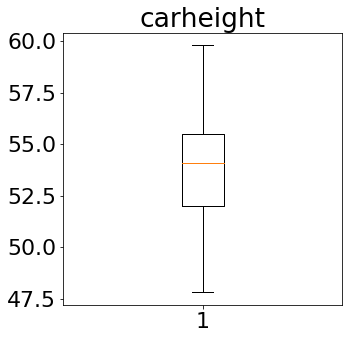

In [500]:
plt.figure(figsize=(5, 5))
plt.rcParams.update({'font.size': 22})
plt.title('carheight')
plt.boxplot(x = 'carheight', data = car)

{'whiskers': [<matplotlib.lines.Line2D at 0x275fd0b6648>,
 'caps': [<matplotlib.lines.Line2D at 0x275fd0bfc08>,
 'boxes': [<matplotlib.lines.Line2D at 0x275fd0ae048>],
 'medians': [<matplotlib.lines.Line2D at 0x275fd0c4f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x275fd0c4c48>],
 'means': []}

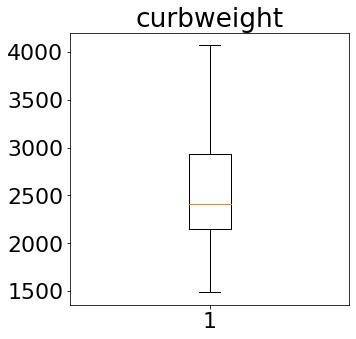

In [501]:
plt.figure(figsize=(5, 5))
plt.rcParams.update({'font.size': 22})
plt.title('curbweight')
plt.boxplot(x = 'curbweight', data = car)

{'whiskers': [<matplotlib.lines.Line2D at 0x275fd117a88>,
 'caps': [<matplotlib.lines.Line2D at 0x275fd126a88>,
 'boxes': [<matplotlib.lines.Line2D at 0x275fd10f588>],
 'medians': [<matplotlib.lines.Line2D at 0x275fd126c08>],
 'fliers': [<matplotlib.lines.Line2D at 0x275fd12dac8>],
 'means': []}

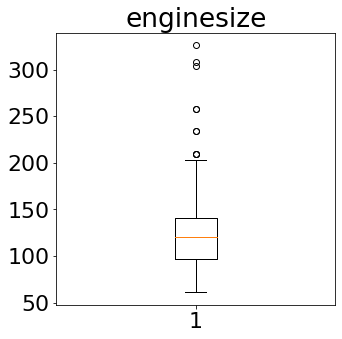

In [502]:
plt.figure(figsize=(5, 5))
plt.rcParams.update({'font.size': 22})
plt.title('enginesize')
plt.boxplot(x = 'enginesize', data = car)

{'whiskers': [<matplotlib.lines.Line2D at 0x275fd1772c8>,
 'caps': [<matplotlib.lines.Line2D at 0x275fd186dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x275fd16df48>],
 'medians': [<matplotlib.lines.Line2D at 0x275fd18bf08>],
 'fliers': [<matplotlib.lines.Line2D at 0x275fd18ff08>],
 'means': []}

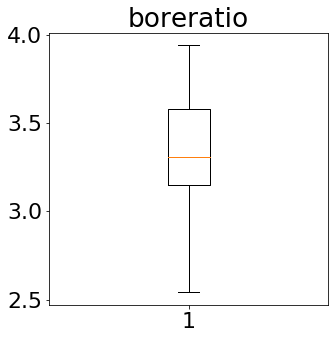

In [503]:
plt.figure(figsize=(5, 5))
plt.rcParams.update({'font.size': 22})
plt.title('boreratio')
plt.boxplot(x = 'boreratio', data = car)

{'whiskers': [<matplotlib.lines.Line2D at 0x275fd1dfe08>,
 'caps': [<matplotlib.lines.Line2D at 0x275fd1e8fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x275fd1d4e88>],
 'medians': [<matplotlib.lines.Line2D at 0x275fd1efec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x275fd1f4d48>],
 'means': []}

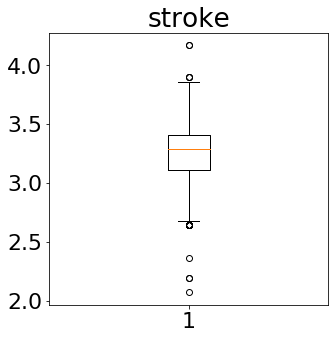

In [504]:
plt.figure(figsize=(5, 5))
plt.rcParams.update({'font.size': 22})
plt.title('stroke')
plt.boxplot(x = 'stroke', data = car)

{'whiskers': [<matplotlib.lines.Line2D at 0x275fd245ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x275fd250c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x275fd2399c8>],
 'medians': [<matplotlib.lines.Line2D at 0x275fd255b88>],
 'fliers': [<matplotlib.lines.Line2D at 0x275fd25b9c8>],
 'means': []}

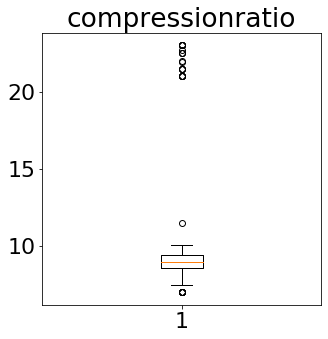

In [505]:
plt.figure(figsize=(5, 5))
plt.rcParams.update({'font.size': 22})
plt.title('compressionratio')
plt.boxplot(x = 'compressionratio', data = car)

{'whiskers': [<matplotlib.lines.Line2D at 0x275fd2a4d08>,
 'caps': [<matplotlib.lines.Line2D at 0x275fd2aeec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x275fd29ab08>],
 'medians': [<matplotlib.lines.Line2D at 0x275fd2b2dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x275fd2b8c48>],
 'means': []}

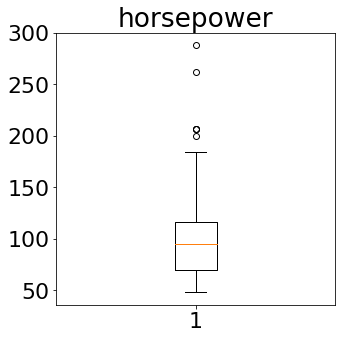

In [506]:
plt.figure(figsize=(5, 5))
plt.rcParams.update({'font.size': 22})
plt.title('horsepower')
plt.boxplot(x = 'horsepower', data = car)

{'whiskers': [<matplotlib.lines.Line2D at 0x275fd30ba88>,
 'caps': [<matplotlib.lines.Line2D at 0x275fd316c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x275fd2ff9c8>],
 'medians': [<matplotlib.lines.Line2D at 0x275fd31bb48>],
 'fliers': [<matplotlib.lines.Line2D at 0x275fd3209c8>],
 'means': []}

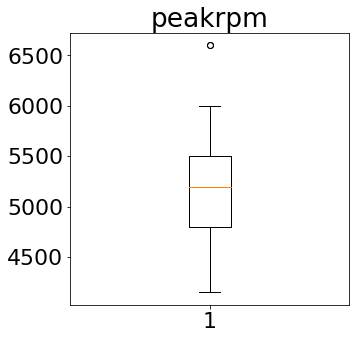

In [507]:
plt.figure(figsize=(5, 5))
plt.rcParams.update({'font.size': 22})
plt.title('peakrpm')
plt.boxplot(x = 'peakrpm', data = car)

{'whiskers': [<matplotlib.lines.Line2D at 0x275fd373488>,
 'caps': [<matplotlib.lines.Line2D at 0x275fd37cd08>,
 'boxes': [<matplotlib.lines.Line2D at 0x275fd367348>],
 'medians': [<matplotlib.lines.Line2D at 0x275fd382c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x275fd382d88>],
 'means': []}

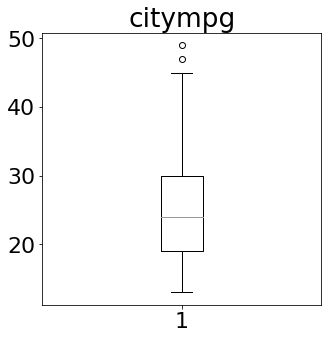

In [508]:
plt.figure(figsize=(5, 5))
plt.rcParams.update({'font.size': 22})
plt.title("citympg")
plt.boxplot(x = 'citympg', data = car)

{'whiskers': [<matplotlib.lines.Line2D at 0x275fd3d53c8>,
 'caps': [<matplotlib.lines.Line2D at 0x275fd3e0b88>,
 'boxes': [<matplotlib.lines.Line2D at 0x275fd3ca1c8>],
 'medians': [<matplotlib.lines.Line2D at 0x275fd3e6b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x275fd3e6c08>],
 'means': []}

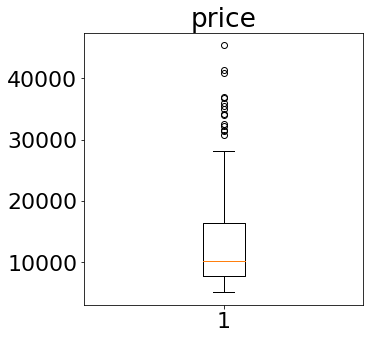

In [509]:
plt.figure(figsize=(5, 5))
plt.rcParams.update({'font.size': 22})
plt.title("price")
plt.boxplot(x = 'price', data = car)

{'whiskers': [<matplotlib.lines.Line2D at 0x275fd43a148>,
 'caps': [<matplotlib.lines.Line2D at 0x275fd43fe48>,
 'boxes': [<matplotlib.lines.Line2D at 0x275fd42e088>],
 'medians': [<matplotlib.lines.Line2D at 0x275fd448988>],
 'fliers': [<matplotlib.lines.Line2D at 0x275fd448fc8>],
 'means': []}

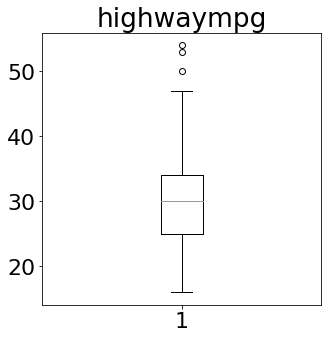

In [510]:
plt.figure(figsize=(5, 5))
plt.rcParams.update({'font.size': 22})
plt.title("highwaympg")
plt.boxplot(x = 'highwaympg', data = car)

### From the above its clear that enginesize, horsepower and compression ration has many outliers and should be treated.


### We decide to treat the outliers by clipping the variables 'horsepower','enginesize' at 96 precentile value. And clip compressionratio at 90 percentile value

In [511]:
print(car[['horsepower','enginesize']].quantile([0.01, .96]))
print(car[['compressionratio']].quantile([0.01, .90]))

      horsepower  enginesize
0.01       52.12        70.0
0.96      182.00       209.0
      compressionratio
0.01              7.00
0.90             10.94


In [512]:
# Outilers in price of cars
car['horsepower'][np.abs(car['horsepower'] > 182.00)]= 182.00
car['enginesize'][np.abs(car['enginesize'] > 209.00)]= 209.00
car['compressionratio'][np.abs(car['compressionratio'] > 10.94)]= 10.94

In [513]:
# Keeping the data which is less than 3 std

car= car[np.abs(car.price-car.price.mean()) <= (3*car.price.std())]

## Lets remove correlated variables and create new variables

Earlier, from the scatter plot and the heatmap, we noticed there is a high correlation between carlength, wheelbase, car width, car weight and city/highway mpg's. Lets create new variables from these to try reducing the multicolinearlity.

In [514]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 204
Data columns (total 25 columns):
symboling           202 non-null object
CarName             202 non-null object
fueltype            202 non-null object
aspiration          202 non-null object
doornumber          202 non-null object
carbody             202 non-null object
drivewheel          202 non-null object
enginelocation      202 non-null object
wheelbase           202 non-null float64
carlength           202 non-null float64
carwidth            202 non-null float64
carheight           202 non-null float64
curbweight          202 non-null int64
enginetype          202 non-null object
cylindernumber      202 non-null object
enginesize          202 non-null int64
fuelsystem          202 non-null object
boreratio           202 non-null float64
stroke              202 non-null float64
compressionratio    202 non-null float64
horsepower          202 non-null int64
peakrpm             202 non-null int64
citympg     

In [515]:
# Creating new variable carLWratio
car['carLWratio'] = car.carlength/car.carwidth
# Creating new variable carWHratio
car['carWHratio'] = car.carwidth/car.carheight
# Creating new variable PWratio
car['PWratio'] = car.horsepower/car.curbweight
# Creating new variable HCmpgratio
car['HCmpgratio'] = car.highwaympg/car.citympg
## droping the orignal variables
car.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)

In [516]:
# Splitting CarName cloumn to get the CompanyName
car['CompanyName'] = car['CarName'].str.split(" ",1).str[0]

In [517]:
#Dropping original CarName column
car = car.drop('CarName', axis =1)

In [518]:
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio,CompanyName
0,risky,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,alfa-romero
1,risky,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,alfa-romero
2,moderate,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,...,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,alfa-romero
3,risky,gas,std,four,sedan,fwd,front,99.8,2337,ohc,...,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,audi
4,risky,gas,std,four,sedan,4wd,front,99.4,2824,ohc,...,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,audi


In [519]:
# Fixing spelling mistakes in CompanyName column
car['CompanyName'] = car['CompanyName'].apply(lambda x: 'mazda' if x=='maxda' else ('porsche' if x=='porcshce' else ('toyota' if x=='toyouta' else ('volkswagen' if x=='vokswagen' else ('volkswagen' if x=='vw' else x)))))

### Since company brand name is also related to car price, lets bin the feature into the below three caregories in terms of the brand value

lowtier if company mean price is below 10,000
midtier if company mean price is above 10,000 and below 20,000
hightier if company mean price is above 20,000

In [520]:
car.groupby('CompanyName').price.mean().sort_values(ascending=False)

CompanyName
jaguar         34600.000000
porsche        31400.500000
buick          30469.333333
bmw            23947.857143
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
nissan         10704.882353
mazda          10652.882353
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Nissan          5499.000000
Name: price, dtype: float64

In [521]:
company_seg_d = {
    'cheverolet' : 'lowtier',
    'dodge' : 'lowtier',
    'plymouth' : 'lowtier',
    'honda' : 'lowtier',
    'subaru' : 'lowtier',
    'isuzu' : 'lowtier',
    'mitsubishi' : 'lowtier',
    'renault' : 'lowtier',
    'toyota' : 'lowtier',
    'volkswagen' : 'midtier',
    'nissan' : 'midtier',
    'mazda' : 'midtier',
    'saab' : 'midtier',
    'peugeot' : 'midtier',
    'alfa-romero' : 'midtier',
    'mercury' : 'midtier',
    'audi' : 'midtier',
    'volvo' : 'midtier',
    'bmw' : 'hightier',
    'buick' : 'hightier',
    'porsche' : 'hightier',
    'jaguar' : 'hightier',
    }
car['company_seg'] = car['CompanyName'].map(company_seg_d)
# Dropping the orignal car_company variable
car.drop('CompanyName',axis=1,inplace=True)
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio,company_seg
0,risky,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,midtier
1,risky,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,midtier
2,moderate,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,...,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,midtier
3,risky,gas,std,four,sedan,fwd,front,99.8,2337,ohc,...,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,midtier
4,risky,gas,std,four,sedan,4wd,front,99.4,2824,ohc,...,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,midtier


### Lets handle the categorial variables 
- Variables with 2 different values will be changed to 0 and 1
- Variables with more than two different values will be handled by dummy creation


In [522]:
# Converting categorical variables with two levels to either 1 or 0
car['fueltype'] = car['fueltype'].apply(lambda x: 1 if x=='gas' else 0)
car['aspiration'] = car['aspiration'].apply(lambda x: 1 if x=='std' else 0)
car['doornumber'] = car['doornumber'].apply(lambda x: 1 if x=='2' else 0)
car['enginelocation'] = car['enginelocation'].apply(lambda x: 1 if x=='front' else 0)
car.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio,company_seg
0,risky,1,1,0,convertible,rwd,1,88.6,2548,dohc,...,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,midtier
1,risky,1,1,0,convertible,rwd,1,88.6,2548,dohc,...,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,midtier
2,moderate,1,1,0,hatchback,rwd,1,94.5,2823,ohcv,...,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,midtier
3,risky,1,1,0,sedan,fwd,1,99.8,2337,ohc,...,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,midtier
4,risky,1,1,0,sedan,4wd,1,99.4,2824,ohc,...,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,midtier


In [523]:
# Get the dummy variables for the feature 'carbody' and store it in a new variable - 'status1'
status1 = pd.get_dummies(car['carbody'], drop_first = True)
car = pd.concat([car, status1], axis = 1)
car.drop(['carbody'], axis = 1, inplace = True)

In [524]:
# Get the dummy variables for the feature 'drivewheel' and store it in a new variable - 'status1'
status1 = pd.get_dummies(car['drivewheel'], drop_first = True)
car = pd.concat([car, status1], axis = 1)
car.drop(['drivewheel'], axis = 1, inplace = True)

In [525]:
# Get the dummy variables for the feature 'enginetype' and store it in a new variable - 'status1'
status1 = pd.get_dummies(car['enginetype'], drop_first = True)
car = pd.concat([car, status1], axis = 1)
car.drop(['enginetype'], axis = 1, inplace = True)

In [526]:
# Get the dummy variables for the feature 'cylindernumber' and store it in a new variable - 'status1'
status1 = pd.get_dummies(car['cylindernumber'], drop_first = True)
car = pd.concat([car, status1], axis = 1)
car.drop(['cylindernumber'], axis = 1, inplace = True)

In [527]:
# Get the dummy variables for the feature 'fuelsystem' and store it in a new variable - 'status1'
status1 = pd.get_dummies(car['fuelsystem'], drop_first = True)
car = pd.concat([car, status1], axis = 1)
car.drop(['fuelsystem'], axis = 1, inplace = True)

In [528]:
# Get the dummy variables for the feature 'symboling' and store it in a new variable - 'status1'
status1 = pd.get_dummies(car['symboling'], drop_first = True)
car = pd.concat([car, status1], axis = 1)
car.drop(['symboling'], axis = 1, inplace = True)

In [529]:
# Get the dummy variables for the feature 'company_seg' and store it in a new variable - 'status1'
status1 = pd.get_dummies(car['company_seg'], drop_first = True)
car = pd.concat([car, status1], axis = 1)
car.drop(['company_seg'], axis = 1, inplace = True)

In [530]:
#Round the car price to whole number
car['price'] = car['price'].round()

In [531]:
car.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,4bbl,idi,mfi,mpfi,spdi,spfi,risky,safe,lowtier,midtier
0,1,1,0,1,88.6,2548,130,3.47,2.68,9.0,...,0,0,0,1,0,0,1,0,0,1
1,1,1,0,1,88.6,2548,130,3.47,2.68,9.0,...,0,0,0,1,0,0,1,0,0,1
2,1,1,0,1,94.5,2823,152,2.68,3.47,9.0,...,0,0,0,1,0,0,0,0,0,1
3,1,1,0,1,99.8,2337,109,3.19,3.40,10.0,...,0,0,0,1,0,0,1,0,0,1
4,1,1,0,1,99.4,2824,136,3.19,3.40,8.0,...,0,0,0,1,0,0,1,0,0,1


In [532]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 204
Data columns (total 46 columns):
fueltype            202 non-null int64
aspiration          202 non-null int64
doornumber          202 non-null int64
enginelocation      202 non-null int64
wheelbase           202 non-null float64
curbweight          202 non-null int64
enginesize          202 non-null int64
boreratio           202 non-null float64
stroke              202 non-null float64
compressionratio    202 non-null float64
horsepower          202 non-null int64
peakrpm             202 non-null int64
price               202 non-null float64
carLWratio          202 non-null float64
carWHratio          202 non-null float64
PWratio             202 non-null float64
HCmpgratio          202 non-null float64
hardtop             202 non-null uint8
hatchback           202 non-null uint8
sedan               202 non-null uint8
wagon               202 non-null uint8
fwd                 202 non-null uint8
rwd                

# Step 4 - Test Train Split

In [533]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
car_train, car_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [534]:
# Using Min-Max scaling to scale features
from sklearn.preprocessing import MinMaxScaler

In [535]:
scaler = MinMaxScaler()

In [536]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','carLWratio','carWHratio','PWratio','HCmpgratio','stroke','compressionratio','peakrpm','price']

car_train[num_vars] = scaler.fit_transform(car_train[num_vars])

In [537]:
car_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,4bbl,idi,mfi,mpfi,spdi,spfi,risky,safe,lowtier,midtier
1,1,1,0,1,0.068966,0.411171,0.466216,0.664286,0.290476,0.507614,...,0,0,0,1,0,0,1,0,0,1
165,1,1,0,1,0.272414,0.301396,0.250000,0.500000,0.480952,0.609137,...,0,0,0,1,0,0,0,0,1,0
197,1,1,0,1,0.610345,0.602793,0.540541,0.885714,0.514286,0.634518,...,0,0,0,1,0,0,0,1,0,1
169,1,1,0,1,0.406897,0.412335,0.574324,0.771429,0.680952,0.583756,...,0,0,0,1,0,0,1,0,1,0
190,1,1,0,1,0.272414,0.284329,0.324324,0.464286,0.633333,0.380711,...,0,0,0,1,0,0,1,0,0,1


In [538]:
# Dividing into X and Y sets for medel building
y_train = car_train.pop('price')
X_train = car_train

# Step 5: Building a linear model

We will be using a mix approach. Initially using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn) and then using the Statmodel for statistics analysis of the model

### RFE :

In [539]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [540]:
X_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,4bbl,idi,mfi,mpfi,spdi,spfi,risky,safe,lowtier,midtier
1,1,1,0,1,0.068966,0.411171,0.466216,0.664286,0.290476,0.507614,...,0,0,0,1,0,0,1,0,0,1
165,1,1,0,1,0.272414,0.301396,0.250000,0.500000,0.480952,0.609137,...,0,0,0,1,0,0,0,0,1,0
197,1,1,0,1,0.610345,0.602793,0.540541,0.885714,0.514286,0.634518,...,0,0,0,1,0,0,0,1,0,1
169,1,1,0,1,0.406897,0.412335,0.574324,0.771429,0.680952,0.583756,...,0,0,0,1,0,0,1,0,1,0
190,1,1,0,1,0.272414,0.284329,0.324324,0.464286,0.633333,0.380711,...,0,0,0,1,0,0,1,0,0,1


In [541]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 18)             # running RFE and selecting 15 features best describing the price of cars
rfe = rfe.fit(X_train, y_train)

In [542]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 9),
 ('aspiration', False, 8),
 ('doornumber', False, 27),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 22),
 ('horsepower', True, 1),
 ('peakrpm', False, 7),
 ('carLWratio', True, 1),
 ('carWHratio', True, 1),
 ('PWratio', True, 1),
 ('HCmpgratio', False, 11),
 ('hardtop', False, 4),
 ('hatchback', False, 2),
 ('sedan', False, 5),
 ('wagon', False, 3),
 ('fwd', False, 23),
 ('rwd', False, 13),
 ('dohcv', True, 1),
 ('l', True, 1),
 ('ohc', False, 25),
 ('ohcf', False, 24),
 ('ohcv', True, 1),
 ('rotor', False, 19),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 16),
 ('twelve', False, 18),
 ('two', False, 21),
 ('2bbl', False, 17),
 ('4bbl', False, 6),
 ('idi', False, 14),
 ('mfi', False, 28),
 ('mpfi', False, 20),
 ('spdi', False, 10),
 ('spfi', False, 15),
 ('risky', False, 26),
 ('safe', False, 1

In [543]:
# List of top 15 features to be considered for analysis
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'carLWratio', 'carWHratio', 'PWratio', 'dohcv',
       'l', 'ohcv', 'five', 'four', 'six', 'lowtier', 'midtier'],
      dtype='object')

In [544]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'compressionratio', 'peakrpm',
       'HCmpgratio', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd',
       'ohc', 'ohcf', 'rotor', 'three', 'twelve', 'two', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi', 'spfi', 'risky', 'safe'],
      dtype='object')

## Building a model using statsmodel for details

In [545]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [546]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

In [547]:
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [548]:
# Check the parameters obtained
lr.params

const             0.698618
enginelocation   -0.366844
wheelbase         0.220807
curbweight        0.331551
enginesize        0.260075
boreratio        -0.154085
stroke           -0.152529
horsepower        0.492874
carLWratio       -0.179410
carWHratio        0.103686
PWratio          -0.371861
dohcv            -0.118579
l                -0.114520
ohcv             -0.133247
five             -0.121176
four             -0.107700
six              -0.113691
lowtier          -0.161060
midtier          -0.099207
dtype: float64

In [549]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     112.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.14e-67
Time:                        19:15:22   Log-Likelihood:                 210.16
No. Observations:                 141   AIC:                            -382.3
Df Residuals:                     122   BIC:                            -326.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6986      0.095      7.

### dohcv p value is >0.05. So lets drop it first and re run the model

In [550]:
X_train1 = X_train_lm.drop('dohcv', axis=1)

In [551]:
# Create a second fitted model
lr1 = sm.OLS(y_train, X_train1).fit()

In [552]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     117.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.94e-67
Time:                        19:16:31   Log-Likelihood:                 208.71
No. Observations:                 141   AIC:                            -381.4
Df Residuals:                     123   BIC:                            -328.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6819      0.095      7.

### pwratio p value is >0.05. So lets drop it first and re run the model

In [554]:
X_train2 = X_train1.drop('PWratio', axis=1)

In [555]:
# Create a third fitted model
lr2 = sm.OLS(y_train, X_train2).fit()

In [556]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     123.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.65e-68
Time:                        19:17:11   Log-Likelihood:                 207.56
No. Observations:                 141   AIC:                            -381.1
Df Residuals:                     124   BIC:                            -331.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5799      0.063      9.

In [557]:
# Check VIF
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [558]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,160.82
4,enginesize,12.61
3,curbweight,12.05
13,four,7.32
7,horsepower,5.41
15,lowtier,5.19
14,six,5.15
16,midtier,5.00
2,wheelbase,4.87
8,carLWratio,3.68


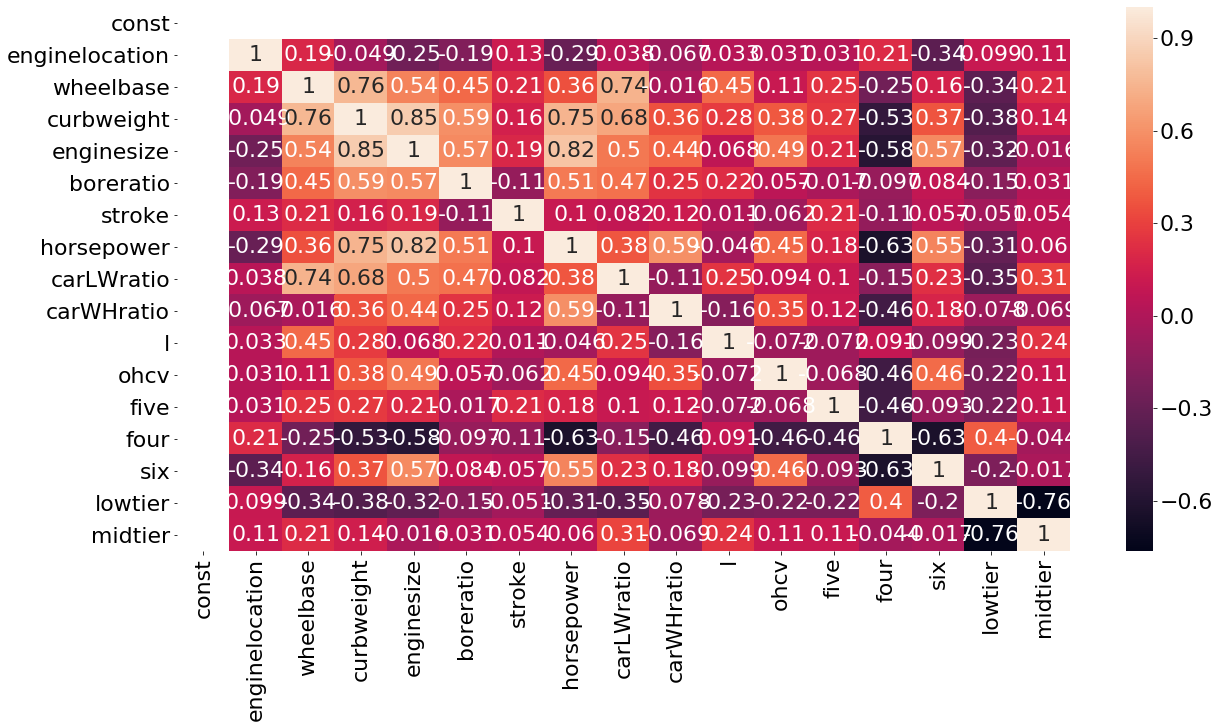

In [559]:
#Heat map to check on the correlation
plt.figure(figsize = (20,10))  
sns.heatmap(X_train2.corr(),annot = True)

### enginesize is having the highest VIF and is strongly corelated and dropping that has the least reduction in Adjusted r2 value. Let's remove this

In [566]:
X_train3 = X_train2.drop('enginesize', axis=1)

In [567]:
# Create a third fitted model
lr3 = sm.OLS(y_train, X_train3).fit()

In [568]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     122.2
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.90e-67
Time:                        19:20:40   Log-Likelihood:                 202.09
No. Observations:                 141   AIC:                            -372.2
Df Residuals:                     125   BIC:                            -325.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5775      0.065      8.

### Delete six as its p value is >0.05

In [569]:
X_train4 = X_train3.drop('six', axis=1)

In [570]:
# Create a forth fitted model
lr = sm.OLS(y_train, X_train4).fit()

In [571]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     130.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           9.05e-68
Time:                        19:21:13   Log-Likelihood:                 201.22
No. Observations:                 141   AIC:                            -372.4
Df Residuals:                     126   BIC:                            -328.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5421      0.059      9.

In [572]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train4.columns
vif['VIF'] = [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,130.56
3,curbweight,9.02
6,horsepower,4.94
2,wheelbase,4.83
13,lowtier,3.97
7,carLWratio,3.63
14,midtier,3.63
12,four,3.47
8,carWHratio,2.25
4,boreratio,2.24


In [573]:
#Dropping five as its has a significant high p value
X_train5 = X_train4.drop('five', axis=1)

In [574]:
# Create a forth fitted model
lr = sm.OLS(y_train, X_train5).fit()

In [575]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     139.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.81e-68
Time:                        19:22:08   Log-Likelihood:                 200.22
No. Observations:                 141   AIC:                            -372.4
Df Residuals:                     127   BIC:                            -331.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5337      0.059      9.

In [576]:
# Dropping four as it has high p value
X_train6 = X_train5.drop('four', axis=1)

In [577]:
# Create a forth fitted model
lr = sm.OLS(y_train, X_train6).fit()

In [578]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     151.2
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.10e-69
Time:                        19:22:41   Log-Likelihood:                 199.80
No. Observations:                 141   AIC:                            -373.6
Df Residuals:                     128   BIC:                            -335.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5302      0.059      9.

In [579]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train6.columns
vif['VIF'] = [variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,128.48
3,curbweight,8.35
2,wheelbase,4.72
6,horsepower,4.54
7,carLWratio,3.43
11,lowtier,3.32
12,midtier,3.21
8,carWHratio,2.20
4,boreratio,1.97
1,enginelocation,1.58


In [580]:
#Dropping ohcv as it has high p value
X_train7 = X_train6.drop('ohcv', axis=1)

In [581]:
# Create a forth fitted model
lr = sm.OLS(y_train, X_train7).fit()

In [582]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     162.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.94e-70
Time:                        19:23:18   Log-Likelihood:                 198.18
No. Observations:                 141   AIC:                            -372.4
Df Residuals:                     129   BIC:                            -337.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5356      0.059      9.

In [583]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train7.columns
vif['VIF'] = [variance_inflation_factor(X_train7.values, i) for i in range(X_train7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,128.12
3,curbweight,7.75
2,wheelbase,4.65
6,horsepower,4.41
7,carLWratio,3.39
10,lowtier,3.32
11,midtier,3.19
8,carWHratio,2.20
4,boreratio,1.85
9,l,1.58


In [602]:
# Dropping curb weight as its highly correlated to other variables and no variable has more than 0.05 p value.
X_train8 = X_train7.drop('wheelbase', axis=1)

In [603]:
# Create a forth fitted model
lr = sm.OLS(y_train, X_train8).fit()

In [604]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     158.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           9.69e-68
Time:                        19:28:25   Log-Likelihood:                 189.94
No. Observations:                 141   AIC:                            -357.9
Df Residuals:                     130   BIC:                            -325.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4738      0.060      7.

In [605]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train8.columns
vif['VIF'] = [variance_inflation_factor(X_train8.values, i) for i in range(X_train8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,119.38
2,curbweight,6.05
5,horsepower,4.33
9,lowtier,3.26
10,midtier,3.13
6,carLWratio,3.02
7,carWHratio,2.13
3,boreratio,1.84
8,l,1.45
1,enginelocation,1.39


In [606]:
# Dropping Car LWratio as it has high p value
X_train9 = X_train8.drop('carLWratio', axis=1)

In [607]:
# Create a forth fitted model
lr = sm.OLS(y_train, X_train9).fit()

In [608]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     173.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.79e-68
Time:                        19:28:31   Log-Likelihood:                 188.46
No. Observations:                 141   AIC:                            -356.9
Df Residuals:                     131   BIC:                            -327.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4507      0.059      7.

In [609]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train9.columns
vif['VIF'] = [variance_inflation_factor(X_train9.values, i) for i in range(X_train9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,113.04
5,horsepower,4.32
2,curbweight,4.07
8,lowtier,3.22
9,midtier,2.89
3,boreratio,1.76
6,carWHratio,1.67
7,l,1.41
1,enginelocation,1.39
4,stroke,1.12


In [610]:
# Dropping stroke as it has high p value
X_train10 = X_train9.drop('stroke', axis=1)

In [611]:
# Create a forth fitted model
lr = sm.OLS(y_train, X_train10).fit()

In [612]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     190.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.21e-68
Time:                        19:28:48   Log-Likelihood:                 186.48
No. Observations:                 141   AIC:                            -355.0
Df Residuals:                     132   BIC:                            -328.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4176      0.057      7.

In [613]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train10.columns
vif['VIF'] = [variance_inflation_factor(X_train10.values, i) for i in range(X_train10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,103.55
4,horsepower,4.32
2,curbweight,3.94
7,lowtier,3.21
8,midtier,2.88
3,boreratio,1.66
5,carWHratio,1.66
6,l,1.41
1,enginelocation,1.38


In [614]:
# Dropping horsepower as it has high p value
X_train11 = X_train10.drop('horsepower', axis=1)

In [615]:
# Create a forth fitted model
lr = sm.OLS(y_train, X_train11).fit()

In [616]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     212.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           5.46e-69
Time:                        19:30:17   Log-Likelihood:                 184.42
No. Observations:                 141   AIC:                            -352.8
Df Residuals:                     133   BIC:                            -329.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4474      0.056      8.

In [617]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train11.columns
vif['VIF'] = [variance_inflation_factor(X_train11.values, i) for i in range(X_train11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,96.34
6,lowtier,3.21
7,midtier,2.87
2,curbweight,2.13
3,boreratio,1.65
4,carWHratio,1.27
5,l,1.24
1,enginelocation,1.16


In [618]:
# Dropping boreratio as it has high p value
X_train12 = X_train11.drop('boreratio', axis=1)

In [619]:
# Create a forth fitted model
lr = sm.OLS(y_train, X_train12).fit()

In [620]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.76e-69
Time:                        19:31:45   Log-Likelihood:                 182.66
No. Observations:                 141   AIC:                            -351.3
Df Residuals:                     134   BIC:                            -330.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4097      0.052      7.

In [622]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train12.columns
vif['VIF'] = [variance_inflation_factor(X_train12.values, i) for i in range(X_train12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,83.21
5,lowtier,3.16
6,midtier,2.86
2,curbweight,1.55
3,carWHratio,1.27
4,l,1.23
1,enginelocation,1.11


# Step 6 - Residual Analysis of the train data

In [623]:
y_train_price = lr.predict(X_train12)

In [624]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

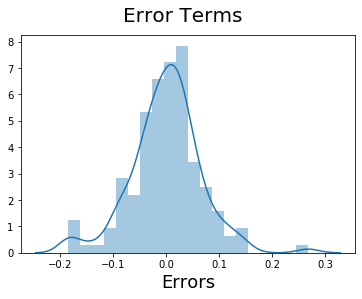

In [625]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### The above plots show that the error terms are normally distributed with mean value at 0.

# Step 7 - Making Predictions

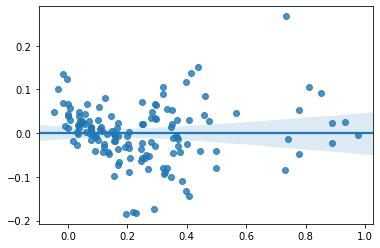

In [626]:
fig = plt.figure()
sns.regplot(y_train_price, (y_train-y_train_price))
plt.show()

### The above plots show that the error terms have a constant variance.

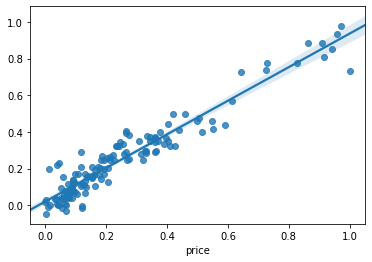

In [627]:
sns.regplot(y_train, y_train_price)
plt.show()

### The line that has been plotted based on beta coefficients represent the data points pretty well

In [628]:
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','carLWratio','carWHratio','PWratio','HCmpgratio','stroke','compressionratio','peakrpm','price']
car_test[num_vars] = scaler.transform(car_test[num_vars])

### Dividing into X_test and y_test

In [629]:
y_test = car_test.pop('price')
X_test = car_test

In [630]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train12= X_train12.drop(['const'], axis=1)
X_test_new = X_test[X_train12.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [631]:
# Making predictions
y_pred = lr.predict(X_test_new)

# Step 8 - Model Evaluation

Text(0, 0.5, 'y_pred')

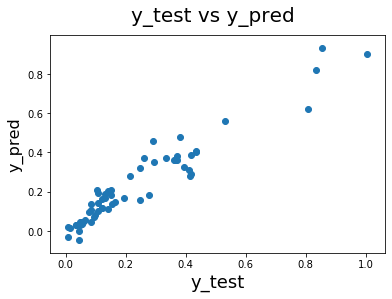

In [632]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [633]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.06276538197978813
Model r2_score: 0.9181513997414658


### From the above it is evident that the test data has a r2_score of 91.81 vs the 91.60 of model12 which makes it a pretty good model.

Text(0, 0.5, 'Views')

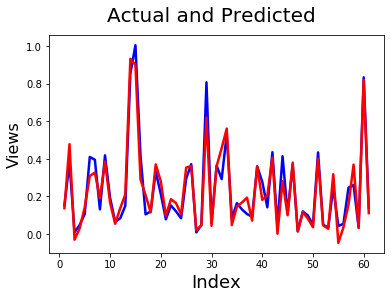

In [635]:
#Actual vs Predicted
c = [i for i in range(1,62,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)     

### The actual vs predicted for the test data set fits in very nicely. the high's and low's are very well overlapped.

In [638]:
# Adjusted R^2 = 1−((1−R2)(N−1)/(N−p−1))
# Here, n,N is the sample size meaning the number of rows you'd have in the dataset and p is the number of predictor variables.
r2_test = r2_score(y_test, y_pred)
Adj_r2_test = 1-.134*60/55
Adj_r2_test

0.8538181818181818

# Step 9 - Inference

 ## Model 12 is a very good model with the below details

#### R-squared:                       0.916
#### Adj. R-squared:                  0.912
#### F-statistic:                     243.3
#### Prob (F-statistic):           1.76e-69                                    

## Conclusions below on the model - 

<font color = blue>1. The R-squared value on the trained data is very close to the Adj. R-Squared value which indicates that none of the parameters in model are redundant. </font><br>
<font color = blue>2. We have a significantly high r2_score on the test dataset.</font><br>
<font color = blue>3. With a low p-value and low VIF, these variables do describe the price of the automobiles to a good extent.</font>

## Conclusions below on resudual analysis  - 

<font color = blue>1. Error Terms almost normnally distributed with mean zero</font><br>
<font color = blue>2. Error terms are independent of each other</font><br>
<font color = blue>3. Error terms have constant variance</font>

# From the model we learn that the variables that can affect Car Price are - 

### 1. Lower and mid tier cars have negative coefficient which means the higher the car tier the more the price will be. 
### 2. Engine type 'l' is negatively correlated with the price. It means the compant should product no or less amount of cars with engine type 'l' and produce more of other types.
### 3. carWH ratio - Has a positive correlation that means cars which have a high value of Weidth to Height ratio is priced higher in the market. So the company should design/product more cars like that.
### 4. curbWeight - Car price increases for  cars with more weight. So company should make cars heaver which will be more costlier.
### 5. enginelocation - Its negatively correlated which suggests cars with engine at the back are higher priced over engine at the front.
